In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/covid_us.csv')

In [3]:
data.head()

,date,Country/Region,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,share_of_last_week,percentage,population
0,2020-01-22,Alabama,32.3182,-86.9023,0,0,0,0,0.0,0.0,49.03185
1,2020-01-22,Alaska,61.3707,-152.4044,0,0,0,0,0.0,0.0,7.31545
2,2020-01-22,American Samoa,NaN,NaN,0,0,0,0,0.0,0.0,NaN
3,2020-01-22,Arizona,33.7298,-111.4312,0,0,0,0,0.0,0.0,72.78717
4,2020-01-22,Arkansas,34.9697,-92.3731,0,0,0,0,0.0,0.0,30.17804


In [4]:
ny = pd.DataFrame()
ny['ds'] = pd.to_datetime(data[data['Country/Region'] == 'New York']['date'])
ny['y'] = (data[data['Country/Region'] == 'New York']['Confirmed'] / 
           (data[data['Country/Region'] == 'New York']['population'] * 1000))

ca = pd.DataFrame()
ca['ds'] = pd.to_datetime(data[data['Country/Region'] == 'California']['date'])
ca['y'] = (data[data['Country/Region'] == 'California']['Confirmed'] / 
           (data[data['Country/Region'] == 'California']['population'] * 1000))

In [5]:
cap = 3
floor = 0
ny['cap'] = cap
ny['floor'] = floor
ny = ny.reset_index(drop=True)
ca['cap'] = cap
ca['floor'] = floor
ca = ca.reset_index(drop=True)

In [6]:
ny.head()

,ds,y,cap,floor
0,2020-01-22,0.0,3,0
1,2020-01-23,0.0,3,0
2,2020-01-24,0.0,3,0
3,2020-01-25,0.0,3,0
4,2020-01-26,0.0,3,0


In [7]:
ny.tail()

,ds,y,cap,floor
204,2020-08-13,2.176671,3,0
205,2020-08-14,2.180408,3,0
206,2020-08-15,2.184181,3,0
207,2020-08-16,2.187301,3,0
208,2020-08-17,2.189399,3,0


In [8]:
print(len(ny))
print(len(ca))

209
209


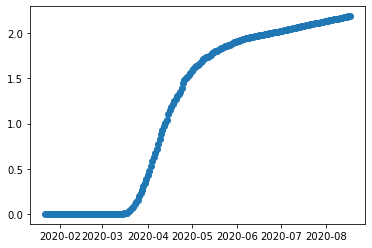

In [9]:
plt.scatter(x=ny.ds, y=ny.y)

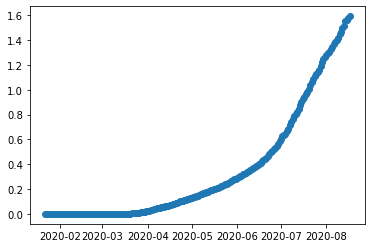

In [10]:
plt.scatter(x=ca.ds, y=ca.y)

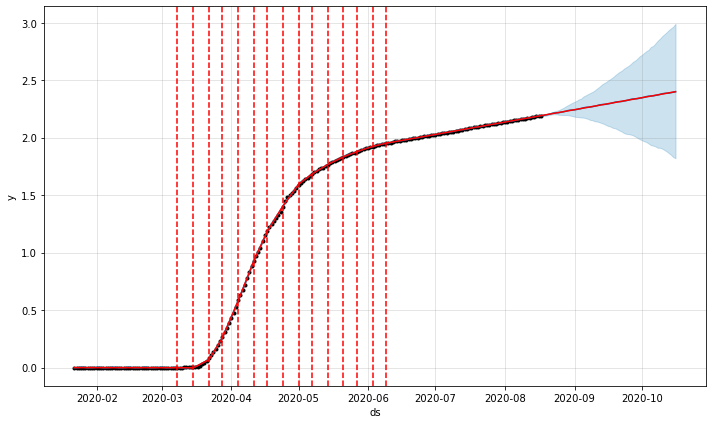

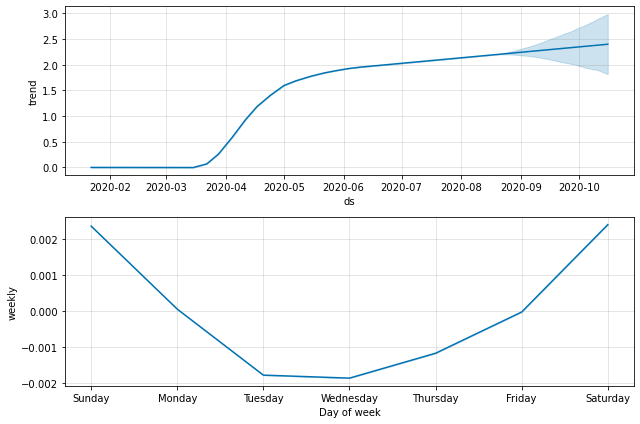

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-03-05 00:00:00 and 2020-05-19 00:00:00


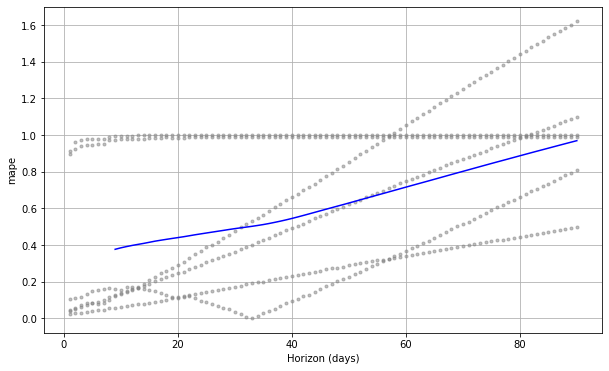

mape: 64.51%


In [11]:
prophet = Prophet(growth='linear',
                  n_changepoints=25,
                  changepoint_range=0.8,
                  yearly_seasonality=False,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0)
prophet.fit(ny)
future = prophet.make_future_dataframe(periods=60, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='30 days', period='15 days', horizon = '90 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

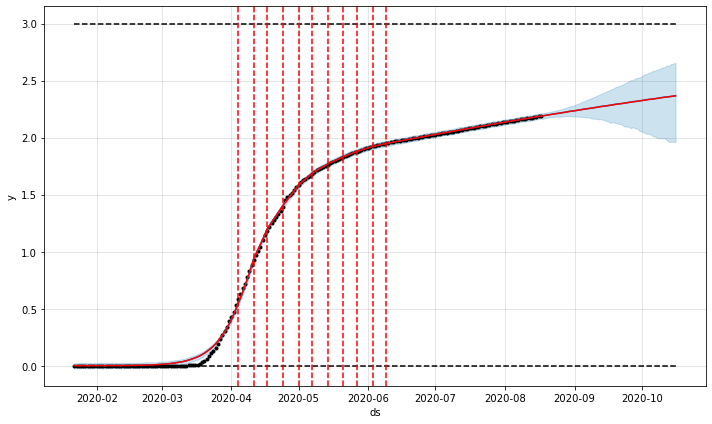

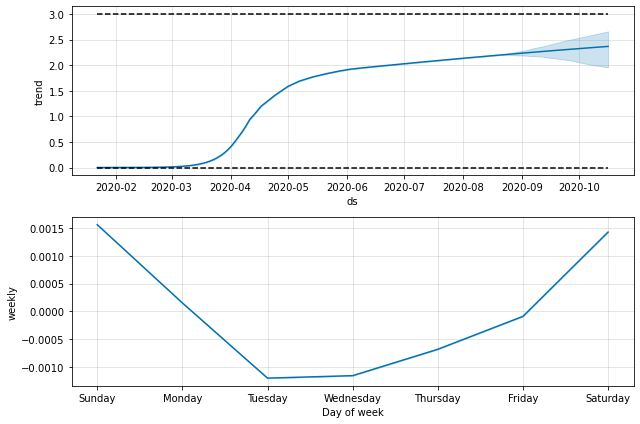

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-03-05 00:00:00 and 2020-05-19 00:00:00


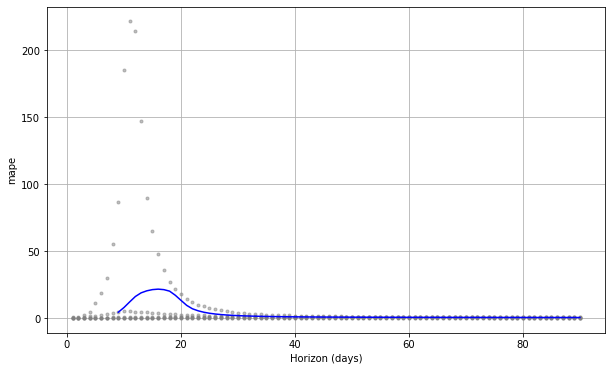

mape: 340.68%


In [12]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.8,
                  yearly_seasonality=False,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  changepoint_prior_scale=.1,
                  mcmc_samples=0)
prophet.fit(ny)
future = prophet.make_future_dataframe(periods=60, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='30 days', period='15 days', horizon = '90 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

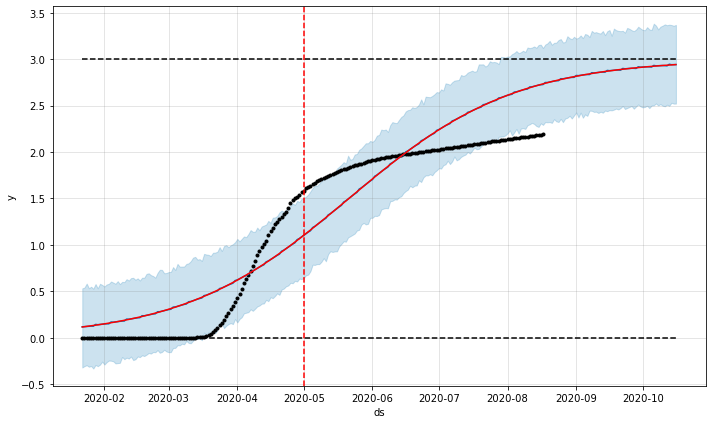

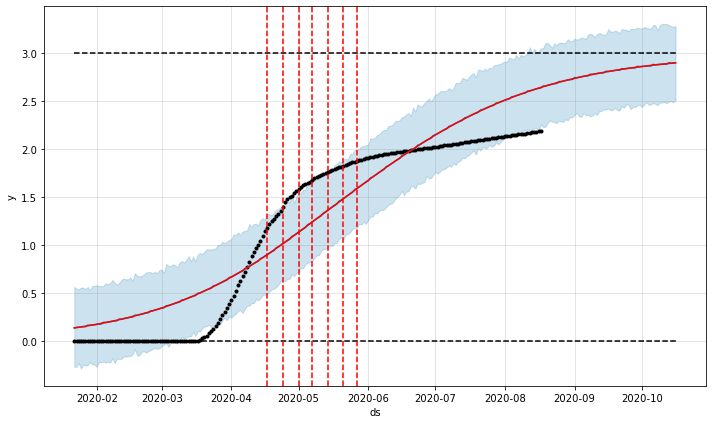

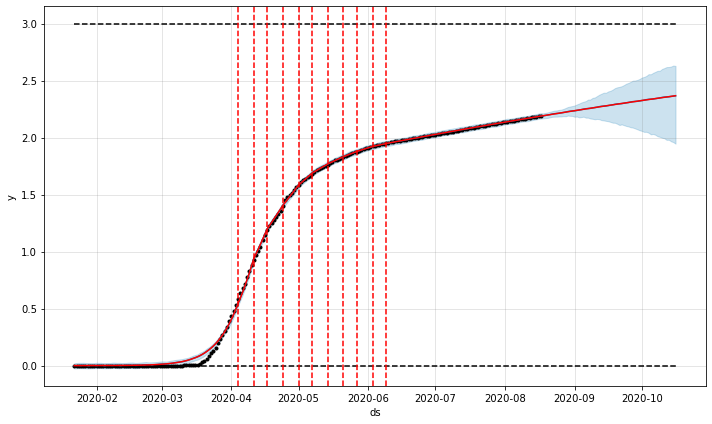

In [13]:
for scale in [.01, .05, .1]:
    prophet = Prophet(growth='logistic',
                      n_changepoints=25,
                      changepoint_range=0.8,
                      yearly_seasonality=False,
                      weekly_seasonality=True,
                      daily_seasonality=False,
                      holidays=None,
                      seasonality_mode='additive',
                      seasonality_prior_scale=10,
                      changepoint_prior_scale=scale,
                      mcmc_samples=0)
    prophet.fit(ny)
    future = prophet.make_future_dataframe(periods=60, freq='D')
    future['cap'] = cap
    future['floor'] = floor
    forecast = prophet.predict(future)
    fig = prophet.plot(forecast)
    a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
    plt.show()

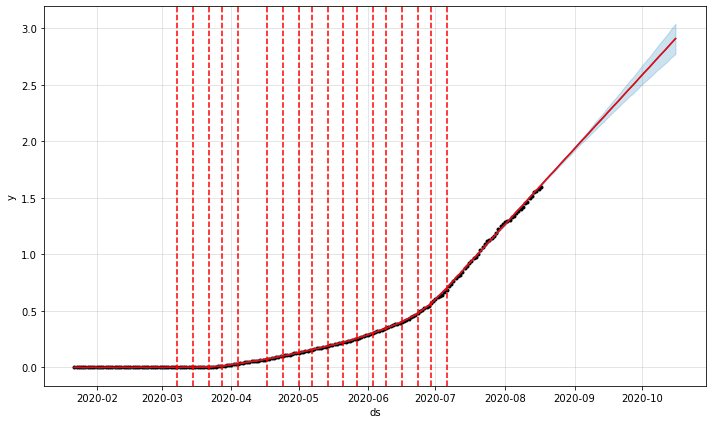

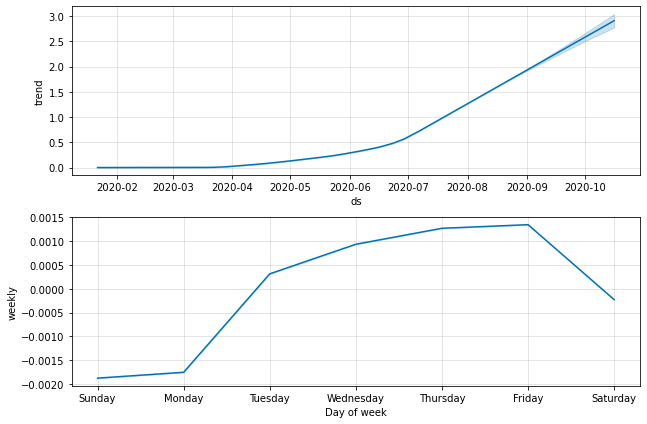

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-03-05 00:00:00 and 2020-05-19 00:00:00


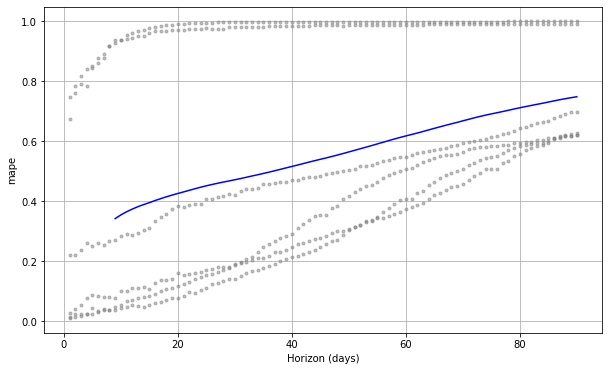

mape: 56.36%


In [14]:
prophet = Prophet(growth='linear',
                  n_changepoints=25,
                  changepoint_range=0.8,
                  yearly_seasonality=False,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0)
prophet.fit(ca)
future = prophet.make_future_dataframe(periods=60, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='30 days', period='15 days', horizon = '90 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

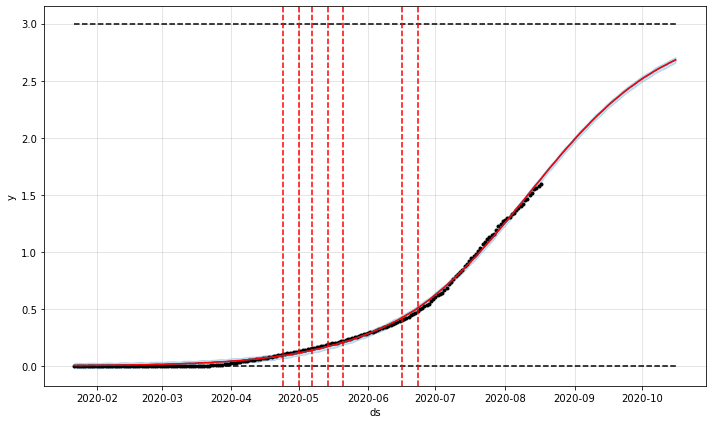

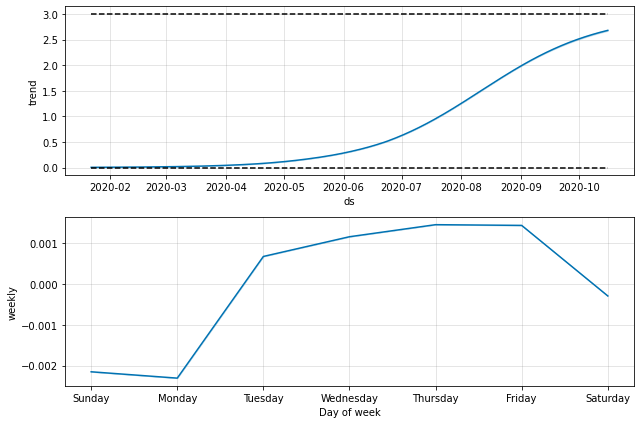

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-03-05 00:00:00 and 2020-05-19 00:00:00


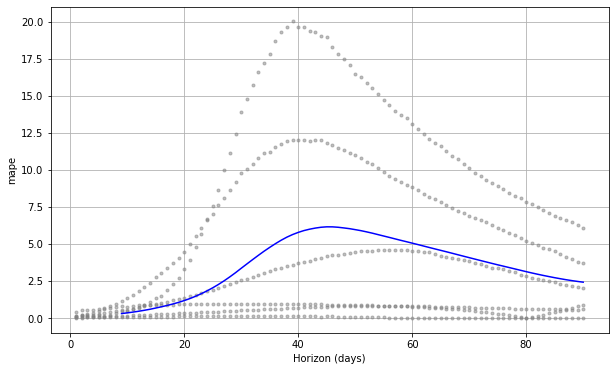

mape: 367.63%


In [15]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.8,
                  yearly_seasonality=False,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  changepoint_prior_scale=.1,
                  mcmc_samples=0)
prophet.fit(ca)
future = prophet.make_future_dataframe(periods=60, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='30 days', period='15 days', horizon = '90 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))